In [127]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [128]:
import numpy as np
import matplotlib.pyplot as plt

## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Redukcja wymiarowości

Praca z wielowymiarowymi danymi niesie ze sobą różne ograniczenia. W jaki sposób możemy wyświetlić próbki, które mają $4$, $5$, $6$, $7$ i więcej cech? Nie możemy stworzyć przecież wykresu $4D$, czy $7D$. Wizualizacja takich danych jest problemem. Kiedy mamy wiele cech w zestawie danych, wpływa to również na szybkość działania naszego modelu. Takie dane zajmują więcej miejsca na nośnikach pamięci. Jeśli mamy zbiór, który zawiera $1000$ cech, to możemy się zastanawiać, czy na pewno wszystkie cechy są istotne i potrzebne dla naszego modelu. Może wystarczy jedynie $100$ cech i wyniki działania modelu uczenia maszynowego byłyby równie satysfakcjonujące, a przy okazji zmniejszylibyśmy wymiarowość próbek i czas obliczeń. 

Problem redukcji wymiarowości jest powszechny w tematyce uczenia maszynowego. Istnieją dwa główne podziały takiej redukcji - selekcja i ekstrakcja cech. Selekcja cech polega na wybraniu pewnego podzbioru cech z oryginalnego zestawu wszystkich cech. W takim przypadku zakładamy, że nie wszystkie cechy są nam potrzebne do stworzenia dobrego modelu, więc pozbywamy się części z nich, licząc na to, że wyniki nie ulegną pogorszeniu. Selekcja cech pozostawia cechy w swojej oryginalnej postaci, nie modyfikuje ich wartości, zmieniamy tylko ich ilość. Ekstrakcja cech jest scenariuszem nieco bardziej skomplikowanym, ponieważ polega na redukcji cech poprzez przekształcenie oryginalnego zestawu cech do nowej przestrzeni cech, w której pozostałe cechy nie mają swoich pierwotnych wartości. Obie kategorie mają swoje wady i zalety. Dzisiaj skupimy się na algorytmie z rodziny ekstrakcji cech. 

##  Analiza głównych składowych

Jedną z najpopularniejszych metod ekstrakcji cech jest **Analiza głównych składowych (ang. Principal component analysis)** w skrócie **PCA**. Jest to algorytm, który redukuje wymiarowość danych poprzez rzutowanie ich na przestrzeń o mniejszej liczbie wymiarów. Rzutowanie to następuje poprzez znalezienie kierunków, w których jest największa wariancja danych. Założeniem algorytmu jest zatem znalezienie nowej przestrzeni cech, tak aby zachować jak najwięcej informacji zawartych w oryginalnych cechach. Przed omówieniem szczegółów algorytmu zobaczmy jego zasadę działania.

Mając dwuwymiarowy zestaw danych z cechami $x_1$ i $x_2$, chcielibyśmy zredukować go do postaci jednowymiarowej. 

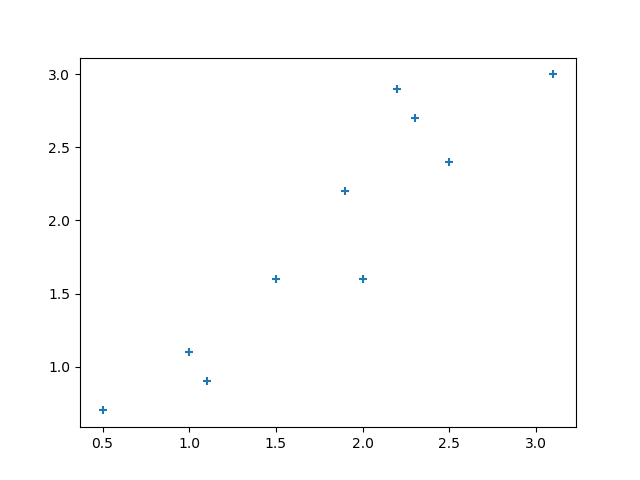

Aby to zrobić, musimy znaleźć kierunki, w których dane są najbardziej zróżnicowane (mają największą wariancję). Takie kierunki będą dwa, a dodatkowo będą one zawsze do siebie prostopadłe. Te kierunki, to właśnie główne składowe.

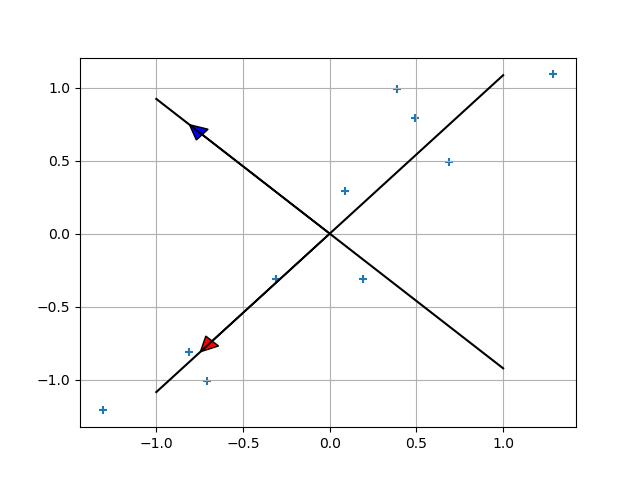

Mając wyznaczone główne składowe, możemy zauważyć, że wzdłuż prostej z czerwoną strzałką jest znacznie większa wariancja danych. Jeśli zatem chcielibyśmy zredukować przestrzeń z $2D$ na $1D$, to powinniśmy rzutować wszystkie punkty z dwuwymiarowej przestrzeni na prostą z czerwoną strzałką.

Po zrzutowaniu punktów na tę prostą dane prezentują się następująco:

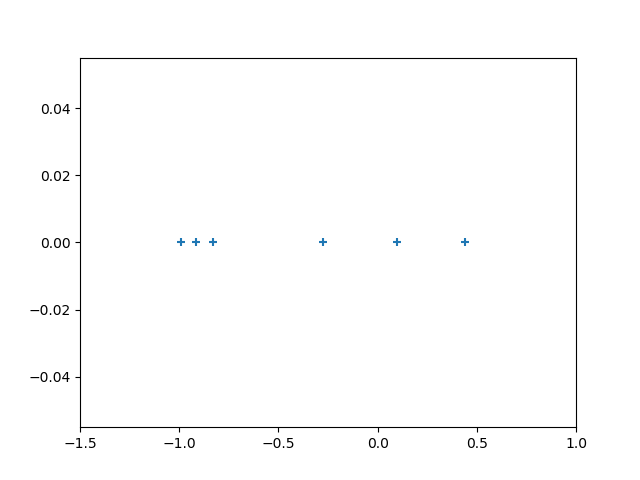

Możemy też spróbować zrzutować punkty na prostą z niebieską strzałką, żeby przekonać się, że punkty będą bardziej "zbite" (mniejsza wariancja danych).

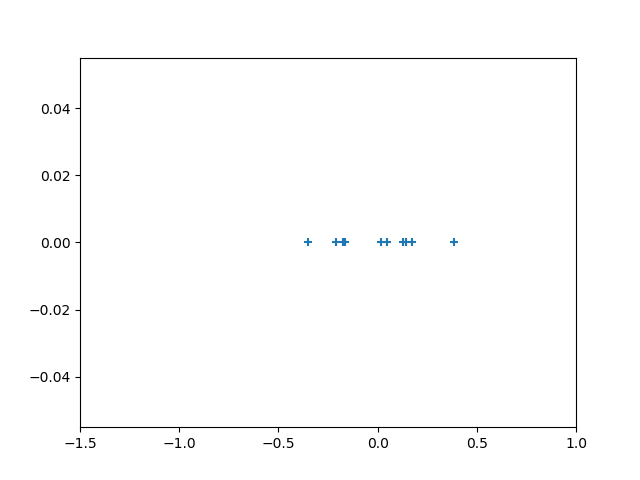

Ta idea dla prostego przypadku dwuwymiarowego jest rozszerzalna i działa dokładnie tak samo dla danych wielowymiarowych. Jeśli mamy już intuicję, w jaki sposób redukowane są wymiary w algorytmie PCA, przejdźmy do szczegółów działania algorytmu.

## Algorytm PCA

Na początku stwórzmy zbiór danych, na którym będziemy przeprowadzać obliczenia.

| **x1** | **x2** |
|--------|--------|
| 1\.2   | 1\.5   |
| 0\.2   | 0\.1   |
| 1\.6   | 1\.8   |
| 2\.2   | 2\.5   |
| 0\.5   | 0\.7   |
| 3\.0   | 2\.6   |
| 3\.2   | 3\.4   |
| 0\.8   | 1\.0   |
| 2\.6   | 2\.8   |
| 1\.5   | 1\.4   |

In [129]:
X = np.array([
    [1.2, 1.5],
    [0.2, 0.1],
    [1.6, 1.8],
    [2.2, 2.5],
    [0.5, 0.7],
    [3.0, 2.6],
    [3.2, 3.4],
    [0.8, 1.0],
    [2.6, 2.8],
    [1.5, 1.4]])

### Wycentrowanie danych

Pierwszym etapem obliczenia macierzy kowariancji jest wycentrowanie zestawu danych, to znaczy odjęcie średniej od każdej próbki. Obliczamy średnią dla cechy $x_1$ i cechy $x_2$.

In [130]:
X_centered = X - X.mean(axis=0)

X_centered

array([[-0.48, -0.28],
       [-1.48, -1.68],
       [-0.08,  0.02],
       [ 0.52,  0.72],
       [-1.18, -1.08],
       [ 1.32,  0.82],
       [ 1.52,  1.62],
       [-0.88, -0.78],
       [ 0.92,  1.02],
       [-0.18, -0.38]])

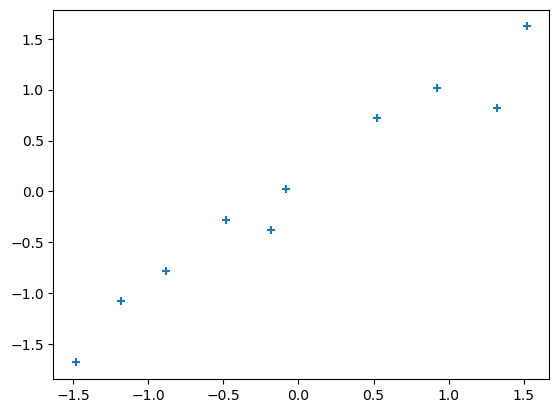

In [131]:
plt.scatter(X_centered[:, 0], X_centered[:, 1], marker='+')

### Obliczenie macierzy kowariancji

Po wycentrowaniu zestawu danych należy obliczyć macierz kowariancji zgodnie ze wzorem:


<!-- $$\Sigma = \frac{1}{m-1}\sum_{i=1}^{n}(x^{(i)})(x^{(i)})^T$$ -- DO POPRAWY!!! -->
$$\Sigma = \frac{1}{m-1}X^TX$$

gdzie:

* $X^T$ jest macierzą o wymiarach $nxm$

* $X$ jest macierzą o wymiarach $mxn$
<!-- * $x^{(i)}$ jest wektorem o wymiarach $nx1$ -->

<!-- * $(x^{(i)})^T$ jest wektorem o wymiarach $1xn$ -->

Więc w wyniku mnożenia powstaje macierz $\Sigma$ o wymiarach $nxn$.


In [132]:
m = X.shape[0]
X_cov = np.dot(X_centered.T, X_centered) / (m - 1)

X_cov

array([[1.08844444, 1.05622222],
       [1.05622222, 1.07511111]])

### Obliczenie wektorów i wartości własnych

Ten etap jest sercem metody analizy głównych składowych. Wektory własne to kierunki, w których jest największa wariancja danych. Wartości własne, które skojarzone są z wektorami własnymi, określają ich istotność. Oznacza to, że wektor własny z największą wartością własną jest pierwszą główną składową, wektor własny z drugą największą wartością jest drugą główną składową i tak dalej. 

Wektory i wartości własne można obliczyć za pomocą metody `np.linalg.eig()` podając jako parametr obliczoną wcześniej macierz kowariancji.

In [133]:
eigenvalues, eigenvectors = np.linalg.eig(X_cov)

Bardzo istotne jest to, że wektory własne zwracane przez `np.linalg.eig()` są reprezentowane jako **kolumny**, a nie wiersze. Oznacza to, że pierwszą kolumną jest pierwszy wektor własny, drugą kolumną jest drugi wektor własny itp.

Ważne jest również to, że zwrócone wartości własne niekoniecznie muszą być posortowane. Musimy zatem sami posortować wartości własne (zachowując powiązanie z wektorami własnymi), żeby mieć pewność, że są ustawione malejąco.

In [134]:
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

eigenvalues, eigenvectors

(array([2.13802104, 0.02553452]),
 array([[ 0.70933479, -0.70487173],
        [ 0.70487173,  0.70933479]]))

### Rysowanie danych z głównymi składowymi

Mając wektory własne możemy w przypadku dwuwymiarowym dość łatwo je narysować. Obliczamy nachylenie zgodnie ze wzorem $\frac{\Delta y}{\Delta x}$.

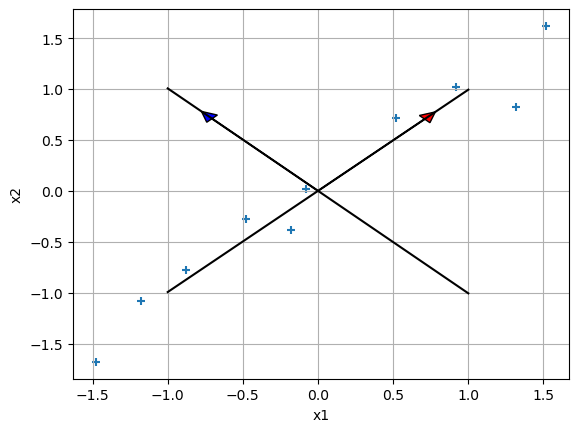

In [135]:
plt.scatter(X_centered[:, 0], X_centered[:, 1], marker='+')

line = np.linspace(-1, 1, 100)
plt.arrow(x=0, y=0, dx=eigenvectors[0, 0], dy=eigenvectors[1, 0], head_width=0.1, head_length=0.1, fc='r', ec='k')
plt.arrow(x=0, y=0, dx=eigenvectors[0, 1], dy=eigenvectors[1, 1], head_width=0.1, head_length=0.1, fc='b', ec='k')
plt.plot(line, line * (eigenvectors[1, 0]/eigenvectors[0, 0]), color='black')
plt.plot(line, line * (eigenvectors[1, 1]/eigenvectors[0, 1]), color='black')

plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()

### Rzutowanie danych na k głównych składowych

Mając obliczoną macierz z kolejnymi wektorami własnymi, możemy wykorzystać ją do zredukowania oryginalnej ilości wymiarów. W sytuacji, gdy mamy jedynie dwa wymiary w oryginalnym zestawie danych, nie mamy dużego pola do popisu. Jednak w zdecydowanej większości przypadków będziemy pracować z danymi, które mają znacznie więcej cech. Dzięki temu możemy wybrać $k$ pierwszych głównych składowych i za ich pomocą rzutować dane do przestrzeni o $k$-tej liczbie wymiarów. 

Operacja rzutowania opisana jest za pomocą wzoru:

$$z = U_{reduced}^T * x$$

gdzie:
* $U_{reduced}$ oznacza macierz z k pierwszymi wektorami własnymi - wymiar $nxk$
* $x$ to oryginalna próbka - wymiar $nx1$

Zatem wyjściowa próbka $z$ będzie miała wymiar $kx1$.

Możemy również rzutować cały zbiór danych "na raz" i wtedy wzór będzie miał następującą formę:

$$Z = X * U_{reduced}$$

gdzie:
* $X$ to zbiór danych - wymiar $mxn$
* $U_{reduced}$ to macierz z k pierwszymi wektorami własnymi - wymiar $nxk$

Zatem nowy zbiór danych ze zredukowaną ilością wymiarów będzie miał wymiar $mxk$.

#### Rzutowanie danych na pierwszą główną składową

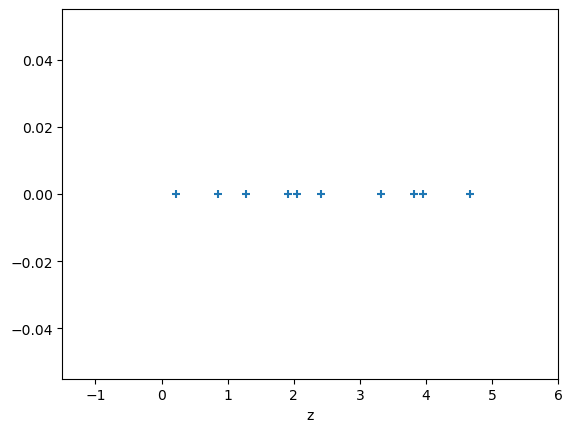

In [136]:
X_pca_1 = np.dot(X, eigenvectors[:, 0])
plt.scatter(X_pca_1, np.zeros(10), marker='+')
plt.xlim((-1.5, 6))
plt.xlabel("z")
plt.show()

#### Rzutowanie danych na drugą główną składową

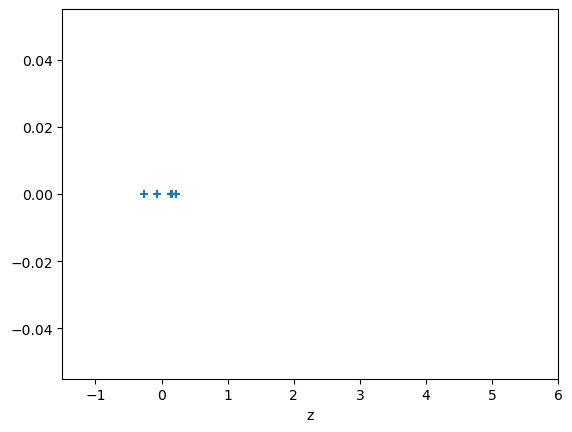

In [137]:
X_pca_2 = np.dot(X, eigenvectors[:, 1])
plt.scatter(X_pca_2, np.zeros(10), marker='+')
plt.xlim((-1.5, 6))
plt.xlabel("z")
plt.show()

Widać, że znacznie korzystniejsze jest rzutowanie danych na pierwszą główną składową, ponieważ dane nie są tak zbite, jak w przypadku drugiej głównej składowej.

### Powrót do oryginalnej liczby wymiarów

Po zrzutowaniu danych na przestrzeń o mniejszej ilości wymiarów jesteśmy w stanie powrócić do oryginalnego $n$-wymiarowego zestawu danych, wykorzystując wszystkie główne składowe. Operacja ta jednak powoduje stratę pewnej ilości informacji, która została utracona poprzez operacje rzutowania. 

Aby powrócić do oryginalnej liczby wymiarów, należy wykonać następującą operację:

$$x_{reconstructed} = U_{reduced} * z$$


* $U_{reduced}$ ma wymiary $nxk$
* $z$ ma wymiary $kx1$ 
* zatem $x_{reconstructed}$ będzie miało wymiar $nx1$.

Postać macierzowa:

$$X_{reconstructed} = Z * U_{reduced}^T$$

* $Z$ ma wymiary $mxk$
* $U_{reduced}^T$ ma wymiary $kxn$
* zatem $X_{reconstructed}$ będzie miało wymiar $mxn$.

#### Operacja odwrotna po rzutowaniu danych na pierwszą główną składową

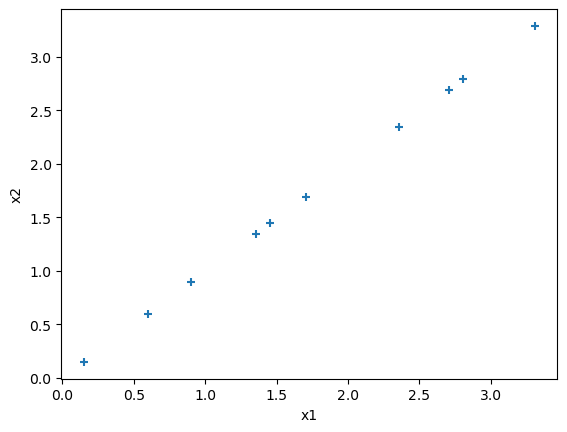

In [138]:
old_data_from_pca_1 = np.dot(X_pca_1.reshape(X_pca_1.shape[0], 1), eigenvectors[:, :1].T)
plt.scatter(old_data_from_pca_1[:, 0], old_data_from_pca_1[:, 1], marker='+')
# plt.xlim((-1.5, 2))
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Widać, że z łatwością udało się odtworzyć dane idące wzdłuż pierwszej głównej składowej, ale nie wzdłuż drugiej.

### Współczynnik wariancji wyjaśnionej

Gdy analizujemy prosty przypadek z dwoma wymiarami, nie mamy wielkiego wyboru jeśli chodzi o redukcje cech. Możemy jedynie rzutować próbki na przestrzeń jednowymiarową. W sytuacji, gdy mamy wiele wymiarów problemem może okazać się wybór właściwej ilości głównych składowych, które będą służyły do stworzenia nowej przestrzeni próbek. Przykładowo, jeśli mamy 6000 wymiarów, to ile $k$ pierwszych głównych składowych powinniśmy wziąć? 2000? 1000? a może jedynie 100? Moglibyśmy oczywiście próbować wszystkich wartości z pewnego przedziału, a następnie mierzyć różnice pomiędzy oryginalnymi próbkami i próbkami zrekonstruowanymi. To dałoby nam pewną miarę błędu. Odpowiednie przekształcenia pozwoliłyby nawet zawrzeć tę wartości w przedziale $(0,1)$. Jednak takie rozwiązanie wymagałoby bardzo dużej ilości obliczeń. 

Na szczęście istnieje inny sposób. Obliczone wraz z wektorami własnymi, wartości własne mają ważną właściwość. Informują o tym, jaka ilość wariancji niesiona jest za pomocą skojarzonej głównej składowej. Jest to tak zwana **wariancja wyjaśniona**. Aby wyciągnąć tę informację, należy obliczyć iloraz każdej wartości własnej i sumy wszystkich wartości własnych:

$$\frac{eigenvalue^{(i)}}{\sum_{i=1}^{n}eigenvalue^{(i)}}$$

Przykładowo, jeżeli wariancja wyjaśniona dla pierwszej warości własnej ma wartość $0.9$, oznacza to, że aż $90%$ wariancji jest wyjaśnionej za pomocą pierwszej głównej składowej. Czyli pozostałe $10%$ jest zawarte w pozostałych głównych składowych.

Częściej jednak stosowana jest operacja obliczania wartości wyjaśnionej z wykorzystaniem skumulowanej sumy. Taka operacja pozwala na łatwe sprawdzenie, jaka ilość wariancji jest wyjaśniona za pomocą $k$ pierwszych składowych.

$$\frac{\sum_{i=1}^{k} eigenvalue^{(i)}}{\sum_{i=1}^{n}eigenvalue^{(i)}}$$

Dzięki temu możemy ustalić, że chcemy, aby nowa przestrzeń cech zachowała $95%$ wariancji:

$$\frac{\sum_{i=1}^{k} eigenvalue^{(i)}}{\sum_{i=1}^{n}eigenvalue^{(i)}} \geq 0.95$$

Ustalenie takiego progu pozwoli nam wybrać odpowiednią ilość pierwszych głównych składowych:

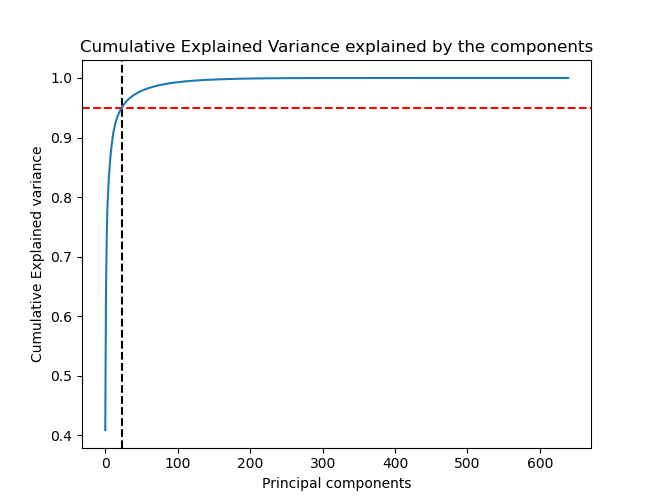

## Zadanie 1

Algorytm PCA jest w stanie znacznie zredukować wymiarowość, ale pozwala również powrócić do oryginalnej ilości wymiarów. Dzięki temu może być stosowany jako algorytm kompresji. Celem tego zadania będzie wykorzystanie algorytmu PCA do kompresji zdjęcia. W katalogu datasets znajduje się zdjęcie o nazwie 'dolphines.jpg'. Wczytaj to zdjęcie w formacie _grayscale*_, a następnie wykonaj eksperymenty redukcji wymiarów dla różnych wartości parametru $k$ ($k$ oznacza $k$ pierwszych głównych składowych). Po zrzutowaniu zdjęcia na mniejszą liczbę wymiarów powróć do oryginalnego rozmiaru i sprawdź, jak różne wartości parametru $k$ wpływają na jakość zrekonstruowanego zdjęcia. Stwórz wykres wariancji wyjaśnionej. Dla jakiej ilości pierwszych głównych składowych zachowane jest $95$ wariancji?

_1. Grayscale (skala szarości) to format, w którym jest tylko jeden kanał zawierający informacje o intensywności (jasności) pikseli. Wszystkie piksele reprezentowane są za pomocą wartości od 0 do 255, gdzie 0 oznacza kolor czarny a 255 kolor biały.
To może zostać zaimplementowane w prosty sposób za pomocą biblioteki PIL:_ 
```
from PIL import Image
img = PIL.Image.open('../dolphines.jpg').convert('L')
```

**Uwaga:** Podczas obliczania wektorów i wartości własnych za pomocą funkcji `np.linalg.eig()` może pojawić się problem z występowaniem liczb zespolonych. Najlepiej wtedy po prostu zostawić jedynie część rzeczywistą:

```
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real
```

Ilość składowych potrzebna do zachowania 95% wariancji: 24


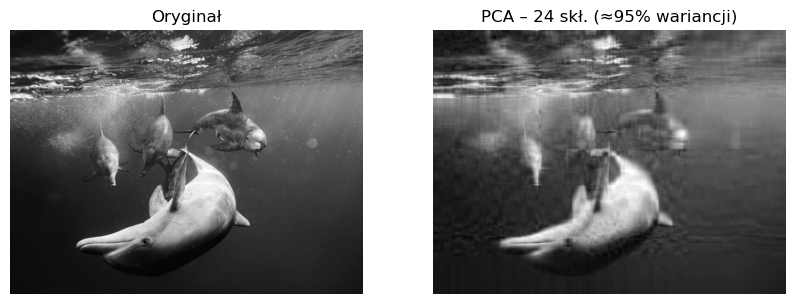

In [139]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img_path = 'dolphines.jpg'
img      = Image.open(img_path).convert('L')
X        = np.asarray(img, dtype=np.float64)

mean_vec    = X.mean(axis=0)
X_centered  = X - mean_vec

U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

explained_variance       = S**2
explained_variance_ratio = explained_variance / explained_variance.sum()
cum_ratio                = np.cumsum(explained_variance_ratio)

k_95 = np.argmax(cum_ratio >= 0.95) + 1
print(f'Ilość składowych potrzebna do zachowania 95% wariancji: {k_95}')

X_reduced = (U[:, :k_95] @ np.diag(S[:k_95]) @ Vt[:k_95, :]) + mean_vec
X_reduced = np.clip(X_reduced, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Oryginał')
axes[0].axis('off')

axes[1].imshow(X_reduced, cmap='gray')
axes[1].set_title(f'PCA – {k_95} skł. (≈95% wariancji)')
axes[1].axis('off')

plt.show()

## Zadanie 2

Obrazy kolorowe zapisane są w formacie RGB. Oznacza to, że taki obraz ma 3 kanały - R, G i B. Przerób program z zadania pierwszego w taki sposób, aby dokonywał kompresji zdjęcia w formacie RGB (usunięcie funkcji `.convert('L')`). Aby dokonać takiej kompresji, należy przeprowadzić kompresje algorytmem PCA osobno dla każdego kanału, a następnie połączyć kanały razem, tak by tworzyły oryginalny obraz. Wykonaj eksperymenty dla różnych wartości parametru $k$.

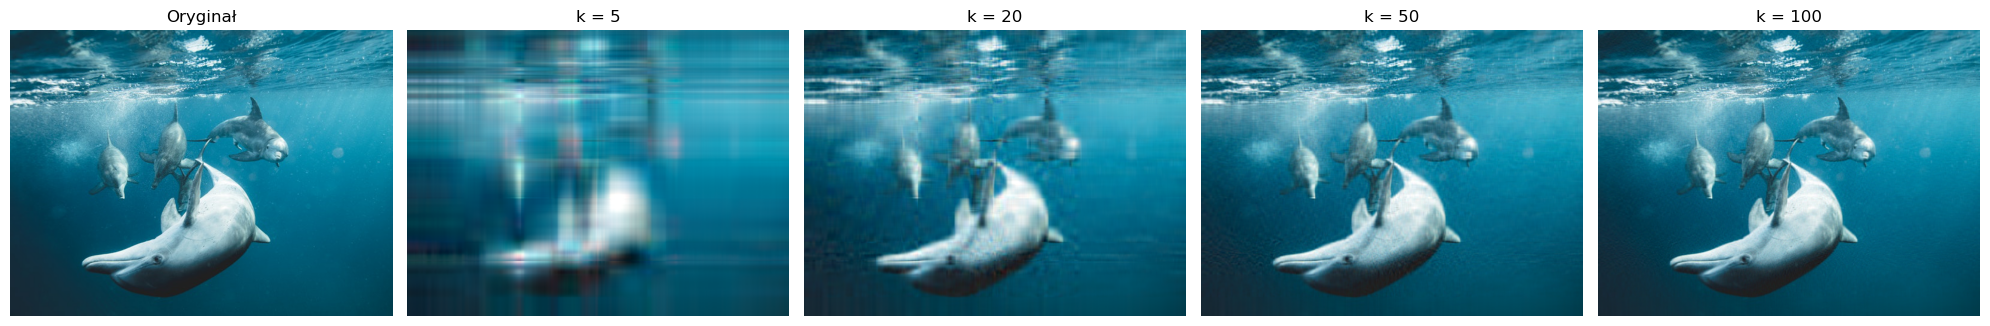

In [140]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def pca_single_channel(channel: np.ndarray, k: int) -> np.ndarray:
    mean_vec       = channel.mean(axis=0)
    centered       = channel - mean_vec
    U, S, Vt       = np.linalg.svd(centered, full_matrices=False)
    recon_centered = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
    recon          = recon_centered + mean_vec
    return np.clip(recon, 0, 255)

img_path = 'dolphines.jpg'
img_rgb  = Image.open(img_path).convert('RGB')
X        = np.asarray(img_rgb, dtype=np.float64)

k_values = [5, 20, 50, 100]

fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(4*(len(k_values)+1), 4))
axes[0].imshow(img_rgb)
axes[0].set_title('Oryginał')
axes[0].axis('off')

for idx, k in enumerate(k_values, start=1):
    channels_recon = [
        pca_single_channel(X[:, :, ch], k)  # R
        for ch in range(3)
    ]
    X_recon = np.stack(channels_recon, axis=2).astype(np.uint8)
    axes[idx].imshow(X_recon)
    axes[idx].set_title(f'k = {k}')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## Zadanie 3

Algorytm analizy głównych składowych bardzo powszechnie wykorzystywany jest również w celach wizualizacyjnych. Przekonaliśmy się już o tym w poprzednich zadaniach, że niemożliwe jest stworzenie wykresu granicy decyzyjnej dla danych o liczbie cech większej, niż $3$. Wykorzystując algorytm PCA do redukcji wymiarowości, możemy zmniejszyć liczbę wymiarów, dzięki czemu w łatwy sposób będziemy w stanie wizualizować nasze dane. Wykorzystaj algorytm PCA, aby zredukować liczbę wymiarów w zestawie danych o nazwie _iris*_ do $2$. Następnie stwórz wykres przedstawiający próbki w nowej przestrzeni cech.

Co sądzisz o takiej redukcji wymiarów? Czy jest ona lepsza niż losowe wybranie dwóch oryginalnych cech i dla nich narysowanie wykresu?

_**UWAGA:** przed przeprowadzeniem analizy głównych składowych dane należy znormalizować np. za pomocą standaryzacji._

_1. Zbiór danych irys można w łatwy sposób wczytać z wykorzystaniem bibliotekę [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)_:
```
from sklearn import datasets
iris = datasets.load_iris()
```

Łączny udział wariancji w 2 skł.: 95.81%


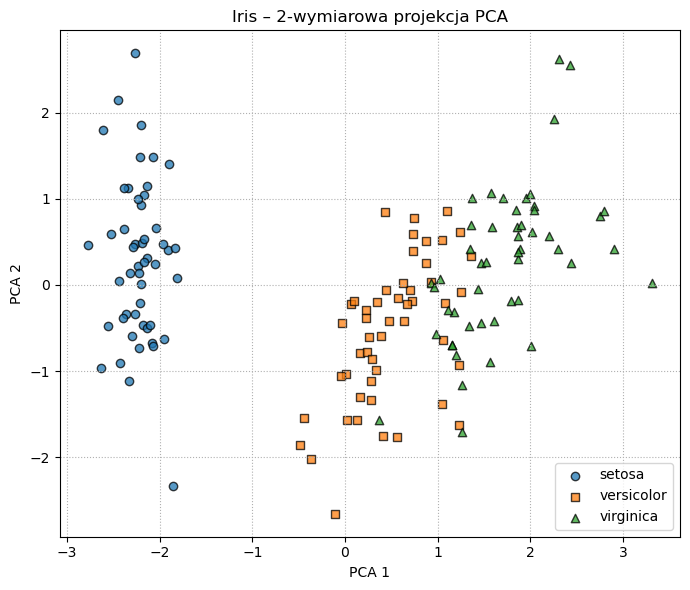

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X, y   = iris.data, iris.target
labels = iris.target_names

X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_std)

print(f'Łączny udział wariancji w 2 skł.: {pca.explained_variance_ratio_.sum():.2%}')

plt.figure(figsize=(7, 6))
markers = ['o', 's', '^']
for i, label in enumerate(labels):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1],
        marker=markers[i], edgecolor='k', label=label, alpha=0.75
    )

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Iris – 2-wymiarowa projekcja PCA')
plt.legend()
plt.grid(True, ls=':')
plt.tight_layout()
plt.show()

\# YOUR ANSWER HERE

## Zadanie 3

Przeprowadź redukcję wymiarowości na zbiorze danych _iris_ analogicznie do zadania 2, jednak tym razem zrzutuj próbki na nową przestrzeń za pomocą $3$ pierwszych głównych składowych. Stwórz wykres. Jakie wnioski możesz wyciągnąć, analizując przestrzeń dwu i trójwymiarową.

3 składowe zachowują 99.48% całkowitej wariancji


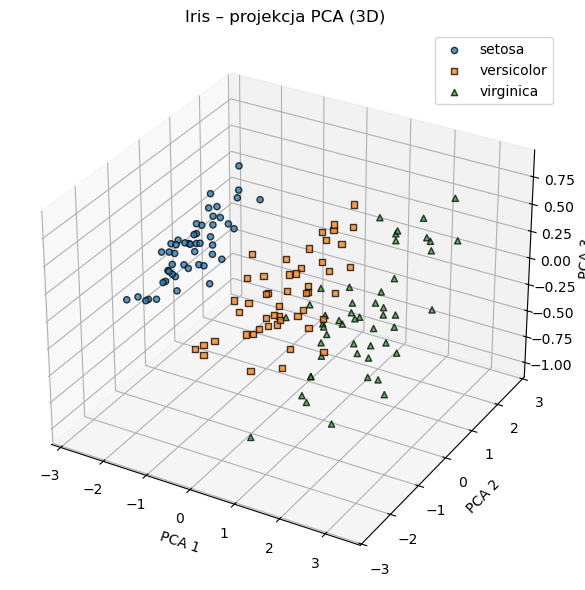

2 składowe zachowują 95.81% wariancji


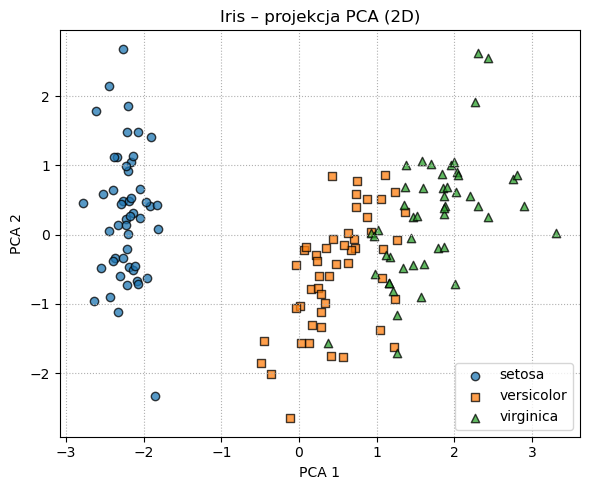

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris   = datasets.load_iris()
X_std  = StandardScaler().fit_transform(iris.data)
y      = iris.target
labels = iris.target_names

pca3   = PCA(n_components=3, random_state=42)
X_pca3 = pca3.fit_transform(X_std)
var3   = pca3.explained_variance_ratio_.sum()
print(f'3 składowe zachowują {var3:.2%} całkowitej wariancji')

fig = plt.figure(figsize=(7, 6))
ax  = fig.add_subplot(111, projection='3d')

markers = ['o', 's', '^']
for i, lab in enumerate(labels):
    ax.scatter(
        X_pca3[y == i, 0], X_pca3[y == i, 1], X_pca3[y == i, 2],
        marker=markers[i], edgecolor='k', label=lab, alpha=0.75
    )

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('Iris – projekcja PCA (3D)')
ax.legend()
plt.tight_layout()
plt.show()

pca2   = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X_std)
var2   = pca2.explained_variance_ratio_.sum()
print(f'2 składowe zachowują {var2:.2%} wariancji')

plt.figure(figsize=(6, 5))
for i, lab in enumerate(labels):
    plt.scatter(
        X_pca2[y == i, 0], X_pca2[y == i, 1],
        marker=markers[i], edgecolor='k', label=lab, alpha=0.75
    )
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Iris – projekcja PCA (2D)')
plt.legend()
plt.grid(ls=':')
plt.tight_layout()
plt.show()

\# YOUR ANSWER HERE